# 手写数字识别


### 问题：分类问题（10类）

### 输入：灰度图像（28×28个像素）

### 输出：分类0-9

# 0.超参数设置

In [1]:

"""
每次在训练集中提取64张图像进行批量化训练，目的是提高训练速度。
就好比搬砖，一次搬一块砖头的效率肯定要比一次能搬64块要低得多
"""
BATCH_SIZE = 64
#学习率，学习率一般为0.01，0.1等等较小的数，为了在梯度下降求解时避免错过最优解
LR = 0.001
"""
EPOCH 假如现在我有1000张训练图像，因为每次训练是64张，
每当我1000张图像训练完就是一个EPOCH，训练多少个EPOCH自己决定
"""
EPOCH = 1
"""
现在我要训练的训练集是系统自带的，需要先下载数据集，
当DOWNLOAD_MNIST为True是表示学要下载数据集，一但下载完，保存
然后这个参数就可以改为False，表示不用再次下载
"""
DOWNLOAD_MNIST = True


# 1.导入数据

### 原始数据（来自keras.datasets.mnist）

In [2]:
# 手动导入数据
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #mnist.load_data('路径')为下载并保存数据集位置，默认位置在C:\Users\管理员\.keras

In [ ]:
'''
# pytorch导入

import torch
import torchvision
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader

#训练集
# 读取
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train = True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

# 划分
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2 )
#每个batch_size的shape为[64, 1, 28, 28]
print("样本")
print(train_data.train_data.shape)
print(train_data.train_data[:3])
print("标签")
print(train_data.train_labels.shape)
print(train_data.train_labels[:3])



# 测试集
# 读取
test_data = torchvision.datasets.MNIST(
    root='./mnist',
    train = False,
)

# 处理

test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.0
"""
test_data.test_data中的shape为[10000, 28, 28]代表1w张图像，都是28x28，当时并未表明channels,因此在unsqueeze在1方向想加一个维度，
则shape变为[10000, 1, 28, 28]，然后转化为tensor的float32类型，取1w张中的2000张，并且将其图片进行归一化处理，避免图像几何变换的影响
"""
#标签取前2000
test_y = test_data.test_labels[:2000]

print("样本")
print(test_x.shape)
print(test_x[:3])
print("标签")
print(test_y.shape)
print(test_y[:3])


'''

# 2.创建自己的Datasets数据集

from torch.utils.data import Dataset, TensorDataset ,DataLoader


>1.将数据转为tensor格式
>>`数据 = torch.tensor(mumpy数据)` 


>2.数据处理
>>图像数据处理：
>>>**图像数据列表维度shape：[图像数量,通道维数,图像长像素,图像宽像素]**  
>>>缺少通道维黑白图像处理:`图片样本data = Variable(torch.unsqueeze(图片样本data, dim=1), volatile=True).type(torch.FloatTensor)/255`  
>>>数据类型转换:`数据变量 = 数据变量.type(torch.FloatTensor)`

>>标签处理
>>>转换为one-hot编码:`标签labels = utils.to_categorical(标签labels)`  
>>>标签转换成long数据格式：`标签labels = 标签labels.long()`

>3.创建数据集
>>`数据集 = TensorDataset(样本data, 标签labels)`

>4.加载数据集
>>`train_loader = DataLoader(train_dataset, batch_size=120)`

In [ ]:
'''
# 对分类标签y进行one-hot编码  utils.to_categorical(标签列表, num_classes=标签类别数, dtype='编码后标签格式')
from tensorflow.keras import utils

print("编码前")
print(train_labels)

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

print("编码后")
print(train_labels)
'''

In [3]:
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader

print(train_images)

# 1.把数据转换成tensor格式
train_images = torch.tensor(train_images)
train_labels = torch.tensor(train_labels)

test_images = torch.tensor(test_images)
test_labels = torch.tensor(test_labels)

print(train_images.shape)


# 2. 数据处理
# 将标签转换成long格式
train_labels = train_labels.long()
test_labels = test_labels.long()

# 图像数据调整增加维度 [图片数, 长, 宽]->[图片数, 通道数, 长, 宽], 将数据转为tensor的Float格式
train_images = Variable(torch.unsqueeze(train_images, dim=1), volatile=True).type(torch.FloatTensor)/255
test_images = Variable(torch.unsqueeze(test_images, dim=1), volatile=True).type(torch.FloatTensor)/255

print(train_images.shape)


# 3.创建数据集
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)


# 4.加载数据集
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader =DataLoader(test_dataset, batch_size=120)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
torch.Size([60000, 28, 28])
torch.Size([60000, 1, 28, 28])


<ipython-input-3-8705a23add60>:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  train_images = Variable(torch.unsqueeze(train_images, dim=1), volatile=True).type(torch.FloatTensor)/255
<ipython-input-3-8705a23add60>:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_images = Variable(torch.unsqueeze(test_images, dim=1), volatile=True).type(torch.FloatTensor)/255


# 3.构建网络

```python
# 导入包
import torch
from torch import nn, optim
import torch.nn.functional as F

# 定义神经网络类
class 自定义神经网络类名(nn.Module):
    # 可学习参数的层（如全连接层、卷积层等）
    def __init__(self):
        super().__init__()
        self.自定义layer名1 = nn.layer层(参数)
        self.自定义layer名2 = nn.layer层(参数)
        self.自定义layer名3 = nn.Sequential(
            nn.layer层(参数)，
            nn.layer层(参数)
        ）
        
    # 实现模型的功能，实现各个层之间的连接关系
    # nn.functional实现不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)的构造
    def forward(self, x):
        x = self.自定义layer名1(x)
        x = F.不可学习参数层(x)
        x = self.自定义layer名2(x)
        x = 不可学习参数层(自定义layer名3(x)
        return x


# 实例化神经网络
model实例 = 自定义神经网络类名()


# 保存模型
torch.save(model实例, '存储路径')

# 加载模型
model = torch.load("model.pth")

```

### 3.1 注意力机制模块

#### （1）注意力机制1 eca注意力模块

In [ ]:
# eca注意力
# -------------------------------------------- #
# 实现方式：
# 1、对输入进来的特征层进行全局平均池化。
# 2、用1*1卷积代替2次全连接。
# 3、取一次Sigmoid将值固定到0-1之间，此时我们获得了输入特征层每一个通道的权值（0-1之间）。
# 4、在获得这个权值后，我们将这个权值乘上原输入特征层即可。
# -------------------------------------------- #


import torch
import torch.nn as nn
import math



class eca_block(nn.Module):
    def __init__(self, channel, b=1, gamma=2):  # channel通道数：用于计算卷积核大小
        super(eca_block, self).__init__()
        # 通过输入通道数自适应计算卷积核大小
        kernel_size = int(abs((math.log(channel, 2) + b) / gamma))
        kernel_size = kernel_size if kernel_size % 2 else kernel_size + 1

        self.avg_pool = nn.AdaptiveAvgPool2d(1)  # # 全局平均池化层
        self.conv = nn.Conv1d(1, 1, kernel_size=kernel_size, padding=(kernel_size - 1) // 2, bias=False)  # 1*1卷积代替全连接
        self.sigmoid = nn.Sigmoid()  # 获取每个特征点的权重

    def forward(self, x):
        y = self.avg_pool(x)
        y = self.conv(y.squeeze(-1).transpose(-1, -2)).transpose(-1, -2).unsqueeze(-1)
        y = self.sigmoid(y)
        return x * y.expand_as(x)
    

#### （2）注意力机制2 CBAM模块

In [4]:
# CBAM = 通道注意力机制 + 空间注意力机制


# 通道注意力机制
# ------------------------------ #
# 1.对输入进来的单个特征层，分别进行全局平均池化和全局最大池化（消除像素空间hw维度，保留通道维度c）
# 2.对平均池化和最大池化的结果，利用共享的全连接层进行处理
# 3.对处理后的两个结果进行相加，然后取一个sigmoid, 获得输入特征层每一个通道的权值（0-1之间）
# 4.将这个权值乘上原输入特征层
# ------------------------------ #


import torch
import torch.nn as nn
import math


class ChannelAttention(nn.Module):
    def __init__(self, channel, ratio=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)  # 全局平均池化层,输出尺寸为[图片数b,通道数c,1,1]
        self.max_pool = nn.AdaptiveMaxPool2d(1)  # 全局最大池化层,输出尺寸为[图片数b,通道数c,1,1]

        # 共享的全连接
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // ratio, False),  # 第一次全连接
            nn.ReLU(),
            nn.Linear(channel // ratio, channel, False)  # 第二次全连接
        )
        # 可利用1x1卷积代替全连接
        # self.fc1   = nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False)
        # self.relu1 = nn.ReLU()
        # self.fc2   = nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)

        # sigmoid层
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        b, c, h, w = x.size()  # 计算输入特征层的size：图片数b, 通道数c, 高h, 宽w
        max_pool_out = self.max_pool(x).view([b, c])  # 1.全局最大池化，并转换格式为[图片数,通道数](消除图片像素hw维度)
        avg_pool_out = self.avg_pool(x).view([b, c])  # 1.全局平均池化，并转换格式为[图片数,通道数](消除图片像素hw维度)

        max_fc_out = self.fc(max_pool_out)  # 2.全局最大池化结果进行共享的全连接层进行处理
        avg_fc_out = self.fc(avg_pool_out)  # 2.全局平均池化结果进行共享的全连接层进行处理

        out = max_fc_out + avg_fc_out  # 3.对处理后的两个结果进行相加
        out = self.sigmoid(out).view([b, c, 1, 1])  # 3. 然后取一个sigmoid，获得输入特征层每一个特征点的权值
        return out

        # avg_out = self.fc2(self.relu1(self.fc1(self.avg_pool(x))))  # 全局平均池化->全连接
        # max_out = self.fc2(self.relu1(self.fc1(self.max_pool(x))))
        # out = avg_out + max_out
        # return self.sigmoid(out)



# 空间注意力机制
# ------------------------------ #
# 1. 会对输入进来的特征层，在每一个特征点的通道上取最大值和平均值(图片中同一像素点上的不同维度平均值，消除通道维c，保留像素空间hw维)
# 2. 将这两个结果进行一个堆叠，利用一次通道数为1的卷积调整通道数
# 3. 取一个sigmoid获得输入特征层每一个特征点的权值（0-1之间）
# 4. 将这个权值乘上原输入特征层
# ------------------------------ #
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        assert kernel_size in (3, 7), 'kernel size must be 3 or 7'  # 卷积核conv layer大小必须为3或7
        padding = 3 if kernel_size == 7 else 1   # 当卷积核大小为7时，输入的每一条边补充3的层数；当卷积核大小为3时，输入的每一条边补充1的层数

        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)  # 卷积：输入维度2[MaxPool,AvgPool]，输出维度1
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)    # 1.在每一个特征点的通道上取平均值(图片中同一像素点上的不同维度平均值) 结果消除通道c维度
        max_out, _ = torch.max(x, dim=1, keepdim=True)  # 1.在每一个特征点的通道上取最大值(图片中同一像素点上的不同维度最大值) 结果消除通道c维度

        x = torch.cat([avg_out, max_out], dim=1)  # 2.通道维度堆叠
        x = self.conv1(x)  # 2.利用一次通道数为1的卷积调整通道数

        return self.sigmoid(x)  # 3.取一个sigmoid获得输入特征层每一个特征点的权值



# CBAM
class cbam_block(nn.Module):
    def __init__(self, channel, ratio=8, kernel_size=7):
        super(cbam_block, self).__init__()
        self.channelattention = ChannelAttention(channel, ratio=ratio)
        self.spatialattention = SpatialAttention(kernel_size=kernel_size)

    def forward(self, x):
        x = x * self.channelattention(x)
        x = x * self.spatialattention(x)
        return x




### 3.2卷积神经网络（主干网络）

#### ·可学习layer

>**卷积层**
>>nn.Conv2d(
>>&nbsp;&nbsp;&nbsp;  in_channels = 输入特征矩阵的深度,   
>>&nbsp;&nbsp;&nbsp;  out_channels = 卷积核数|输出特征矩阵深度,   
>>&nbsp;&nbsp;&nbsp;  kernel_size = (卷积核长, 卷积核宽),   
>>&nbsp;&nbsp;&nbsp;  stride = 卷积框步长,   
>>&nbsp;&nbsp;&nbsp;  padding = (填充上下行数, 填充左右列数),   
>>&nbsp;&nbsp;&nbsp;  dilation = 卷积核元素之间的间距1,   
>>&nbsp;&nbsp;&nbsp;  groups = 从输入通道到输出通道的阻塞连接数1,   
>>&nbsp;&nbsp;&nbsp;  bias = 添加偏置T/F,   
>>&nbsp;&nbsp;&nbsp;  padding_mode = '填充数字zeros'  
>>)

>>说明：
>>>in_channels = 输入通道维的元素数  
>>>图像(通道，图像长，图像宽)（黑白图像通道=1，RGB图像通道=3）   
>>>out_channels = 提取特征数 = 输出特征矩阵深度 = 输出特征矩阵通道维

>**全连接层**
>>nn.Linear(in_features=每个输入样本的大小, out_features=每个输出样本的大小)  
>>说明：


#### ·不可学习layer
>**将多维数据转成一维**
>>x.view(x.size(0), -1)  
>>说明：在卷积层转全连接层之间使用，用在forward(self, x)中

说明：在最后一个卷积层前加入注意力模块

def __init__(self):
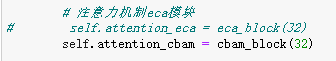

def forward(self, x):
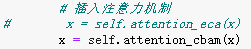

#### （1）加入注意力机制1 eca注意力模块

In [ ]:
# 在第二个卷积层后插入eca注意力模块


import torch
from torch import nn, optim
import torch.nn.functional as F


# 定义神经网络类
class CNN_eca(nn.Module):
    # 可学习参数的层（如全连接层、卷积层等）
    def __init__(self):
        super().__init__()
        
        # 第一部分卷积层1
        self.conv1 = nn.Sequential(
            # 卷积层(输入通道维1，输出通道维16，卷积窗口3*3)
            nn.Conv2d(1, 16, kernel_size=(3,3), stride=1, padding=1),  # 维度变换(1,28,28) （黑白图像1通道，长28像素，宽28像素）->(16,28,28) （16个卷积核提取16个特征通道，长28，宽28）图像边缘扩展，没被卷积抛去
            # 激活函数
            nn.ReLU(),
            # 池化层
            nn.MaxPool2d(2) # 维度变化(16,28,28)->(16,14,14)
        )
            
        # 第二部分卷积层2
        self.conv2 = nn.Sequential(
            # 卷积层(输入通道维16，输出通道维32，卷积窗口3*3)
            nn.Conv2d(16, 32, kernel_size=(3,3), stride=1, padding=1),  # 维度变换(16,14,14)->(32,14,14)
            # 激活函数
            nn.ReLU(),
            # 池化层
            nn.MaxPool2d(2) # 维度变化(32,14,14)->(32,7,7)
        )
        
        # 注意力机制eca模块
        self.attention_eca = eca_block(32)
#        self.attention_cbam = cbam_block(32)
        
            
        # 全连接层
        self.out = nn.Linear(32*7*7, 10)
            
            
        
    # 实现模型的功能，实现各个层之间的连接关系
    # nn.functional实现不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)的构造
    def forward(self, x):
        # 执行卷积层1 conv1
        x = self.conv1(x)
        # 执行卷积层2 conv2
        x = self.conv2(x)
        
        # 插入注意力机制
        x = self.attention_eca(x)
#        x = self.attention_cbam(x)
        
        # 将图像数据转为1维
        x = x.view(x.size(0),-1)
        # 执行全连接层 out
        x = self.out(x)
        return x
    

#### （2）加入注意力机制1 CBAM注意力模块

In [5]:
# 在第二个卷积层后插入cbam注意力模块


import torch
from torch import nn, optim
import torch.nn.functional as F


# 定义神经网络类
class CNN_cbam(nn.Module):
    # 可学习参数的层（如全连接层、卷积层等）
    def __init__(self):
        super().__init__()
        
        # 第一部分卷积层1
        self.conv1 = nn.Sequential(
            # 卷积层(输入通道维1，输出通道维16，卷积窗口3*3)
            nn.Conv2d(1, 16, kernel_size=(3,3), stride=1, padding=1),  # 维度变换(1,28,28) （黑白图像1通道，长28像素，宽28像素）->(16,28,28) （16个卷积核提取16个特征通道，长28，宽28）图像边缘扩展，没被卷积抛去
            # 激活函数
            nn.ReLU(),
            # 池化层
            nn.MaxPool2d(2) # 维度变化(16,28,28)->(16,14,14)
        )
            
        # 第二部分卷积层2
        self.conv2 = nn.Sequential(
            # 卷积层(输入通道维16，输出通道维32，卷积窗口3*3)
            nn.Conv2d(16, 32, kernel_size=(3,3), stride=1, padding=1),  # 维度变换(16,14,14)->(32,14,14)
            # 激活函数
            nn.ReLU(),
            # 池化层
            nn.MaxPool2d(2) # 维度变化(32,14,14)->(32,7,7)
        )
        
        # 注意力机制eca模块
#        self.attention_eca = eca_block(32)
        self.attention_cbam = cbam_block(32)
        
            
        # 全连接层
        self.out = nn.Linear(32*7*7, 10)
            
            
        
    # 实现模型的功能，实现各个层之间的连接关系
    # nn.functional实现不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)的构造
    def forward(self, x):
        # 执行卷积层1 conv1
        x = self.conv1(x)
        # 执行卷积层2 conv2
        x = self.conv2(x)
        
        # 插入注意力机制
#        x = self.attention_eca(x)
        x = self.attention_cbam(x)
        
        # 将图像数据转为1维
        x = x.view(x.size(0),-1)
        # 执行全连接层 out
        x = self.out(x)
        return x

# 4.训练模型

### 手动训练  （加入注意力机制不改变训练方法，此处仅为了保存结果）

1.实例化模型
```
model变量 = 自定义神经网络类名()
```

2.定义损失函数和优化器
```
loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model变量.parameters(), lr = 学习率) 
```

3.训练模型
```
for epoch in range(训练轮数):  # 训练轮数
    
    # 遍历训练集每条数据，进行训练 
    running_loss = 0.0 # 记录一轮中每条训练数据预测的损失累加
    for step, (x, y) in enumerate(训练集加载train_loader):   #【enumerate()枚举对象 得到格式（id，元素）】
        b_x = Variable(x) # 数据x
        b_y = Variable(y) # 标签y
    
        output = model_2(b_x) # 把数据输入进网络
        loss = loss_func(output, b_y) # 计算一条数据的损失
        running_loss += loss.item() # 损失累加
        
        optimizer.zero_grad() # 梯度置零
        loss.backward()  # loss反向传播
        optimizer.step() # 反向传播后参数更新
        
    
    print('训练轮数：', epoch, ' 平均损失：',running_loss/len(train_loader)) #平均损失=每轮每条训练数据损失求和/每轮训练数据数

```

In [14]:
from torch.autograd import Variable


# 自定义训练方法
def train(model):
    
    EPOCH = 3 # 训练轮数

    #记录用于绘图
    losses = []#记录每次迭代后训练的loss
    eval_losses = []#测试的
    
    
    # 损失函数
    loss_func = nn.CrossEntropyLoss()

    # 优化器
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.02) 
    


    for epoch in range(EPOCH):  # 训练轮数
        # 遍历训练集每条数据，进行训练，得到每轮损失loss
        running_loss = 0.0
        for step, (x, y) in enumerate(train_loader):   #【enumerate()枚举对象 得到格式（id，元素）】
            b_x = Variable(x) # 数据x
            b_y = Variable(y) # 标签y

            output = model(b_x) # 把数据输入进网络
            loss = loss_func(output, b_y) # 计算一条数据的损失
            running_loss += loss.item() # 损失累加

            optimizer.zero_grad() # 梯度置零
            loss.backward()  # loss反向传播
            optimizer.step() # 反向传播后参数更新

        losses.append(running_loss/len(train_loader)) # 记录该轮平均损失，后续用于画图
        print('训练轮数：', epoch, ' 训练平均损失loss：',running_loss/len(train_loader)) #平均损失=每轮每条训练数据损失求和/每轮训练数据数



        # 遍历测试集每条数据，进行测试，每轮训练后损失val_loss
        running_loss = 0.0
        for step, (x, y) in enumerate(test_loader): 
            b_x = Variable(x) # 数据x
            b_y = Variable(y) # 标签y

            output = model(b_x) # 把数据输入进网络
            loss = loss_func(output, b_y) # 计算一条数据的损失
            running_loss += loss.item() # 损失累加

        eval_losses.append(running_loss/len(test_loader)) # 记录该轮平均损失，后续用于画图
        print('训练轮数：', epoch, ' 测试平均损失val_loss：',running_loss/len(test_loader)) #平均损失=每轮每条训练数据损失求和/每轮训练数据数

        
    print('end') 
    return losses, eval_losses

    

#### （1）引入ecan注意力模块的cnn网络

In [11]:
# 初始化模型
model = CNN_eca()

# 查看模型
print(model)

NameError: name 'CNN_eca' is not defined

In [ ]:
# 训练

losses, eval_losses = train(model)


In [ ]:
# 画图
import matplotlib.pyplot as plt

plt.plot(range(len(losses)), losses, marker='o',label='losses')
plt.plot(range(len(eval_losses)), eval_losses, marker='*',label='eval_losses')
plt.legend() #图例
plt.title("loss") #标题

plt.show()

In [ ]:
# 保存模型 .save('模型.h5')

torch.save(model,'pytorch_number_ecan.h5')

#### （2）引入CBAM注意力模块的cnn网络

In [12]:
# 初始化模型
model = CNN_cbam()

# 查看模型
print(model)

CNN_cbam(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (attention_cbam): cbam_block(
    (channelattention): ChannelAttention(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (max_pool): AdaptiveMaxPool2d(output_size=1)
      (fc): Sequential(
        (0): Linear(in_features=32, out_features=4, bias=False)
        (1): ReLU()
        (2): Linear(in_features=4, out_features=32, bias=False)
      )
      (sigmoid): Sigmoid()
    )
    (spatialattention): SpatialAttention(
      (conv1): Conv2d(2, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
      (sigmoid): Sigmoid()
    )
  )
  (out): Linear(in_features=

In [15]:
# 训练

losses, eval_losses = train(model)

训练轮数： 0  训练平均损失loss： 0.20297105824733688
训练轮数： 0  测试平均损失val_loss： 0.09809135964384214
训练轮数： 1  训练平均损失loss： 0.0869029611423572
训练轮数： 1  测试平均损失val_loss： 0.07421995443499847
训练轮数： 2  训练平均损失loss： 0.07839510338179874
训练轮数： 2  测试平均损失val_loss： 0.09121088100142688
end


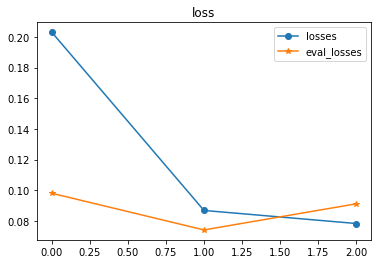

In [16]:
# 画图
import matplotlib.pyplot as plt

plt.plot(range(len(losses)), losses, marker='o',label='losses')
plt.plot(range(len(eval_losses)), eval_losses, marker='*',label='eval_losses')
plt.legend() #图例
plt.title("loss") #标题

plt.show()

In [17]:
# 保存模型 .save('模型.h5')

torch.save(model,'pytorch_number_CBAM.h5')

In [28]:
from torchinfo import summary

model = CNN_cbam()


summary(model, (1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN_cbam                                 [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 14, 14]           --
│    └─Conv2d: 2-1                       [1, 16, 28, 28]           160
│    └─ReLU: 2-2                         [1, 16, 28, 28]           --
│    └─MaxPool2d: 2-3                    [1, 16, 14, 14]           --
├─Sequential: 1-2                        [1, 32, 7, 7]             --
│    └─Conv2d: 2-4                       [1, 32, 14, 14]           4,640
│    └─ReLU: 2-5                         [1, 32, 14, 14]           --
│    └─MaxPool2d: 2-6                    [1, 32, 7, 7]             --
├─cbam_block: 1-3                        [1, 32, 7, 7]             --
│    └─ChannelAttention: 2-7             [1, 32, 1, 1]             --
│    │    └─AdaptiveMaxPool2d: 3-1       [1, 32, 1, 1]             --
│    │    └─AdaptiveAvgPool2d: 3-2       [1, 32, 1, 1]             --
│    │    └

# 5.模型预测

In [19]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchkeras import summary,Model
from sklearn.metrics import accuracy_score


In [ ]:
# 加载模型

#方法一训练模型
model = torch.load('pytorch_number_ecan.h5')


In [20]:
#方法二训练模型
model_2 = torch.load('pytorch_number_CBAM.h5')


图片原始格式: (4, 28, 28)
标签： [1 0 4 1]
图片转换成tensor格式后： torch.Size([4, 28, 28])


<function matplotlib.pyplot.show(close=None, block=None)>

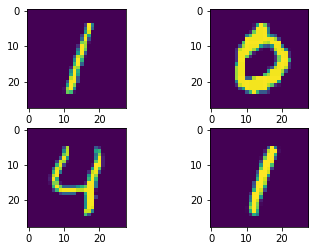

In [21]:
# 手动导入预测数据
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt



(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

# 取前4张图片
test_images = test_images[2:6]
test_labels = test_labels[2:6]
print('图片原始格式:', test_images.shape)
print('标签：', test_labels)

# 图片格式转换成tensor格式
test_images = torch.tensor(test_images)
print('图片转换成tensor格式后：', test_images.shape)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(test_images[i])
plt.show




In [24]:
from torch.autograd import Variable
from torch.utils.data import Dataset, TensorDataset, DataLoader

# 图片类型转换成FloatTensor(预测和训练数据类型一致)
test_images = test_images.type(torch.FloatTensor)/255

print(test_images.shape)
print(test_images)


torch.Size([4, 28, 28])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0.

In [25]:
# 为图片格式添加通道维
pic = test_images[0:4]

pic = pic.reshape(4,1,28,28)
print('添加通道维度', pic.shape)

添加通道维度 torch.Size([4, 1, 28, 28])


#### 方法一模型预测

In [ ]:
# 预测模式

output = model(pic)
print(output)

print('------')
# 按行找到一行内值最大的列号
prediction = torch.max(output, dim=1)
print(prediction)

#### 方法二模型预测

In [ ]:
output = model_2(pic)
print(output)

print('------')
# 按行找到一行内值最大的列号
prediction = torch.max(output, dim=1)
print(prediction)